In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.api as sm
##import mplcursors
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [2]:
COVIDPovCount = pd.read_csv('COVIDpovertycount.csv',index_col = 0)
COVIDPovCount

,State,cases,deaths,All Ages SAIPE Poverty Universe,All Ages in Poverty Count
0,Alabama,387786,14345,"4,763,811","801,758"
1,Alaska,18316,367,"720,866","80,224"
2,Arizona,426614,18857,"7,013,461","990,291"
3,Arkansas,161569,3301,"2,925,473","492,306"
4,California,2664110,102387,"38,818,530","4,972,955"
5,Colorado,766512,37828,"5,577,050","540,579"
6,Connecticut,1314995,104185,"3,468,263","358,519"
7,Delaware,234327,7813,"940,779","114,691"
8,District of Columbia,229466,10822,"669,029","107,806"
9,Florida,1726811,63147,"20,882,673","2,854,438"


In [3]:
COVIDPovCount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   State                            51 non-null     object
 1   cases                            51 non-null     int64 
 2   deaths                           51 non-null     int64 
 3   All Ages SAIPE Poverty Universe  51 non-null     object
 4   All Ages in Poverty Count        51 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.4+ KB


In [4]:
COVIDPovCount['All Ages SAIPE Poverty Universe'] = COVIDPovCount['All Ages SAIPE Poverty Universe'].str.replace(',', '').astype('int64')
COVIDPovCount['All Ages in Poverty Count'] = COVIDPovCount['All Ages in Poverty Count'].str.replace(',', '').astype('int64')

COVIDPovCount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   State                            51 non-null     object
 1   cases                            51 non-null     int64 
 2   deaths                           51 non-null     int64 
 3   All Ages SAIPE Poverty Universe  51 non-null     int64 
 4   All Ages in Poverty Count        51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ KB


In [5]:
COVIDPovCount.head()

,State,cases,deaths,All Ages SAIPE Poverty Universe,All Ages in Poverty Count
0,Alabama,387786,14345,4763811,801758
1,Alaska,18316,367,720866,80224
2,Arizona,426614,18857,7013461,990291
3,Arkansas,161569,3301,2925473,492306
4,California,2664110,102387,38818530,4972955


In [6]:
COVIDPovCount.isnull().sum()

State                              0
cases                              0
deaths                             0
All Ages SAIPE Poverty Universe    0
All Ages in Poverty Count          0
dtype: int64

In [7]:
corr = COVIDPovCount.corr()
corr

,cases,deaths,All Ages SAIPE Poverty Universe,All Ages in Poverty Count
cases,1.000000,0.990033,0.472649,0.451110
deaths,0.990033,1.000000,0.380085,0.363880
All Ages SAIPE Poverty Universe,0.472649,0.380085,1.000000,0.989772
All Ages in Poverty Count,0.451110,0.363880,0.989772,1.000000


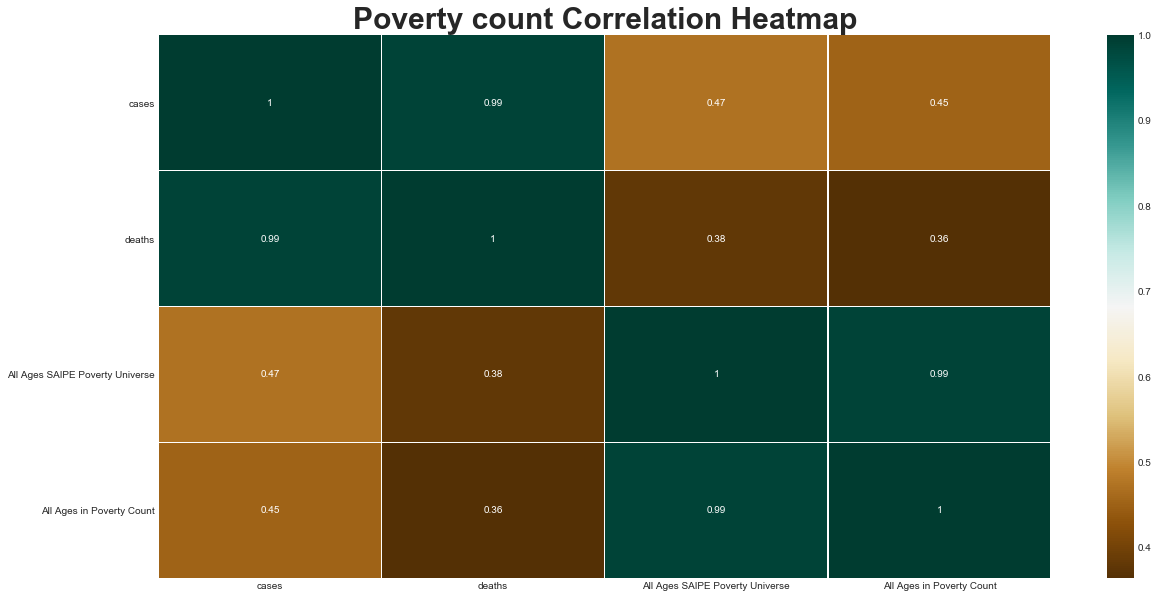

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Poverty count Correlation Heatmap', fontweight = 'bold', fontsize = 30);

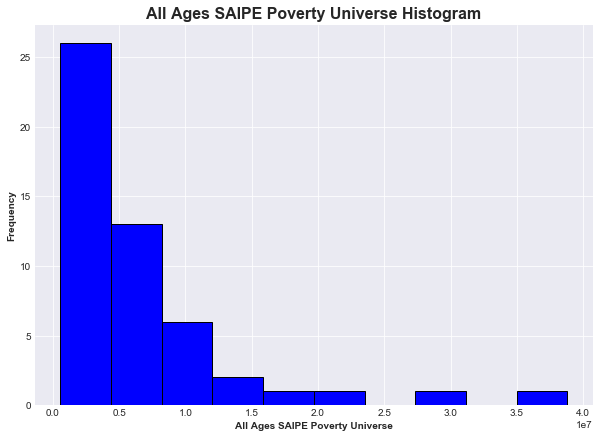

In [9]:
plt.style.use('seaborn-darkgrid')

COVIDPovCount['All Ages SAIPE Poverty Universe'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('All Ages SAIPE Poverty Universe Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('All Ages SAIPE Poverty Universe', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

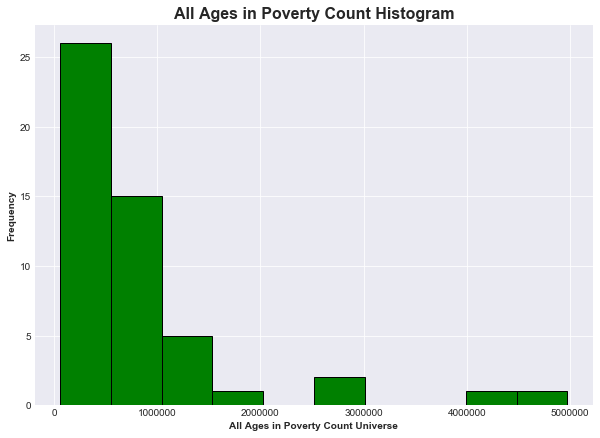

In [10]:
plt.style.use('seaborn-darkgrid')

COVIDPovCount['All Ages in Poverty Count'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('All Ages in Poverty Count Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('All Ages in Poverty Count Universe', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

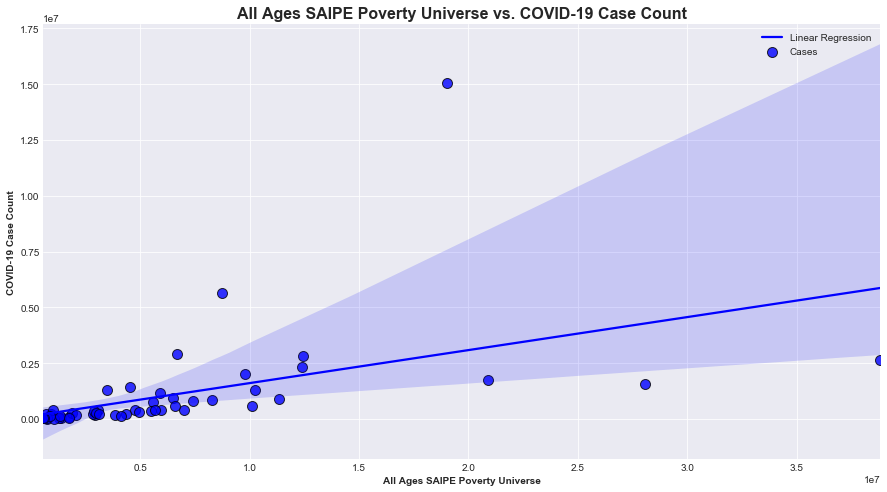

In [11]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'All Ages SAIPE Poverty Universe', y = 'cases', data = COVIDPovCount, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('All Ages SAIPE Poverty Universe vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('All Ages SAIPE Poverty Universe', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [12]:
model1 = sm.OLS(COVIDPovCount['cases'], COVIDPovCount['All Ages SAIPE Poverty Universe']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.364
Model:                            OLS   Adj. R-squared (uncentered):              0.352
Method:                 Least Squares   F-statistic:                              28.67
Date:                Tue, 16 Jun 2020   Prob (F-statistic):                    2.16e-06
Time:                        00:33:46   Log-Likelihood:                         -811.41
No. Observations:                  51   AIC:                                      1625.
Df Residuals:                      50   BIC:                                      1627.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
All Ages SAIPE Poverty Universe     0.1570      0.029      5.354      0.000       0.098       0.216
==============================================================================
Omnibus:                       84.386   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1486.617
Skew:                           4.464   Prob(JB):                         0.00
Kurtosis:                      27.897   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

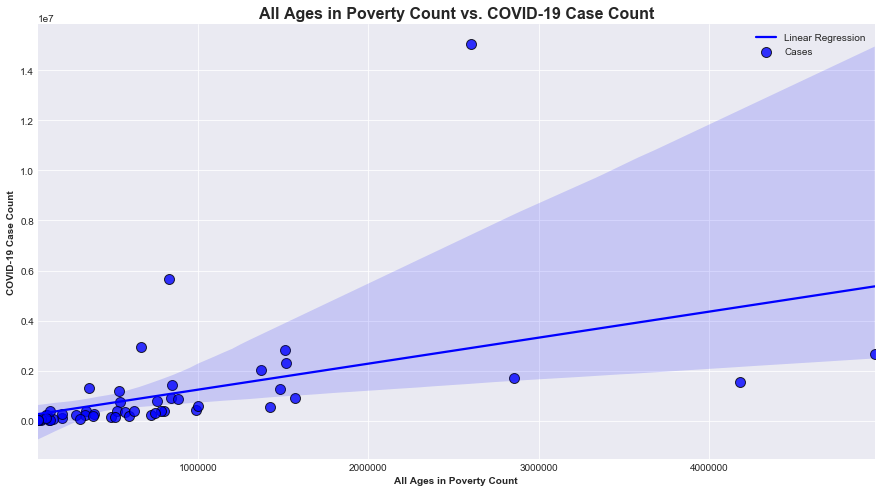

In [13]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'All Ages in Poverty Count', y = 'cases', data = COVIDPovCount, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('All Ages in Poverty Count vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('All Ages in Poverty Count', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [14]:
model2 = sm.OLS(COVIDPovCount['cases'], COVIDPovCount['All Ages in Poverty Count']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.346
Model:                            OLS   Adj. R-squared (uncentered):              0.333
Method:                 Least Squares   F-statistic:                              26.43
Date:                Tue, 16 Jun 2020   Prob (F-statistic):                    4.56e-06
Time:                        00:33:47   Log-Likelihood:                         -812.14
No. Observations:                  51   AIC:                                      1626.
Df Residuals:                      50   BIC:                                      1628.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
All Ages in Poverty Count     1.1427      0.222      5.141      0.000       0.696       1.589
==============================================================================
Omnibus:                       81.985   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1316.051
Skew:                           4.312   Prob(JB):                    1.67e-286
Kurtosis:                      26.344   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model3 = sm.OLS(COVIDPovCount['cases'], COVIDPovCount[['All Ages SAIPE Poverty Universe','All Ages in Poverty Count']]).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.376
Model:                            OLS   Adj. R-squared (uncentered):              0.351
Method:                 Least Squares   F-statistic:                              14.79
Date:                Tue, 16 Jun 2020   Prob (F-statistic):                    9.43e-06
Time:                        00:33:47   Log-Likelihood:                         -810.92
No. Observations:                  51   AIC:                                      1626.
Df Residuals:                      49   BIC:                                      1630.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
All Ages SAIPE Poverty Universe     0.4157      0.268      1.552      0.127      -0.123       0.954
All Ages in Poverty Count          -1.9459      2.003     -0.972      0.336      -5.970       2.078
==============================================================================
Omnibus:                       87.993   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1771.816
Skew:                           4.703   Prob(JB):                         0.00
Kurtosis:                      30.300   Cond. No.                         69.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

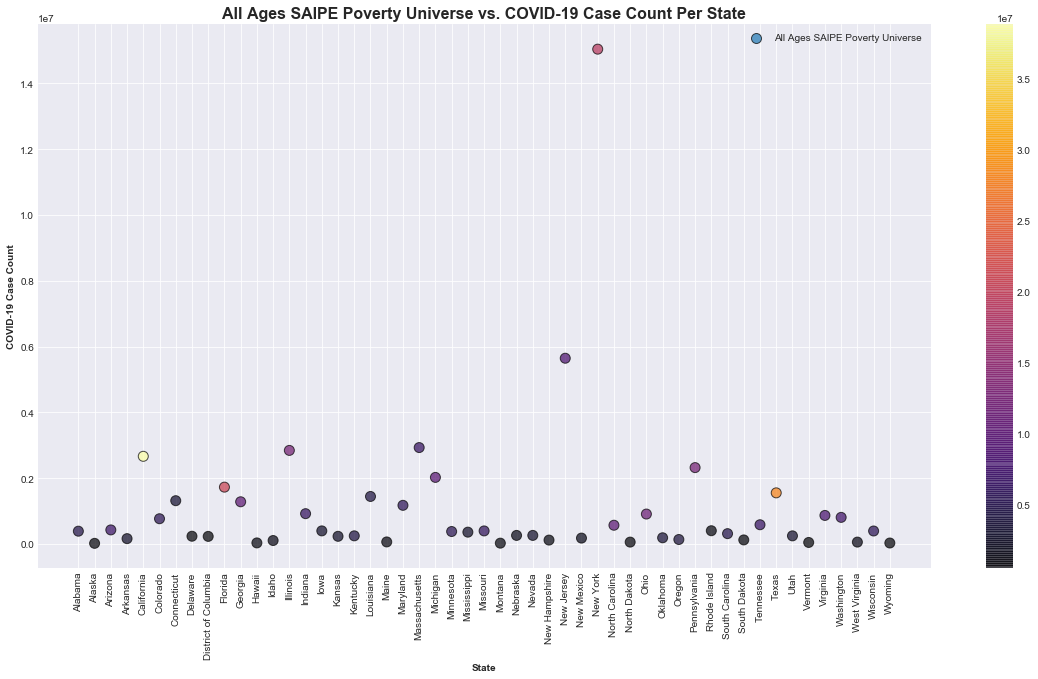

In [16]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = COVIDPovCount['State'] 
y = COVIDPovCount['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = COVIDPovCount['All Ages SAIPE Poverty Universe'], cmap = 'inferno')
plt.title('All Ages SAIPE Poverty Universe vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['All Ages SAIPE Poverty Universe'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

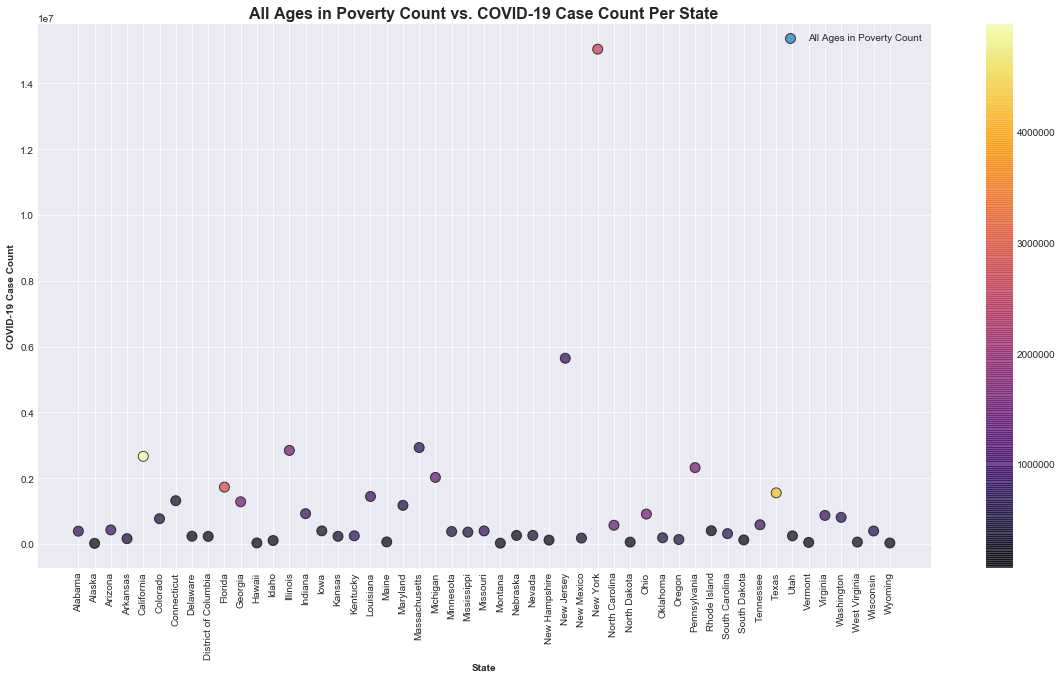

In [17]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = COVIDPovCount['State'] 
y = COVIDPovCount['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = COVIDPovCount['All Ages in Poverty Count'], cmap = 'inferno')
plt.title('All Ages in Poverty Count vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['All Ages in Poverty Count'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [18]:
df=COVIDPovCount
test_len = int(0.25 * len(df))
train_len = len(df) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = df[:train_len]
test = df[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 5)
Test Set Shape: (12, 5)


In [19]:
features_list = ['All Ages SAIPE Poverty Universe']

target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LRModel = LinearRegression()
LRModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = LRModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = LRModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 3018898.028786396
MSE Value: 19360226596305.027
RMS Value: 4400025.749504772
R2 Score: -104.29611903679425


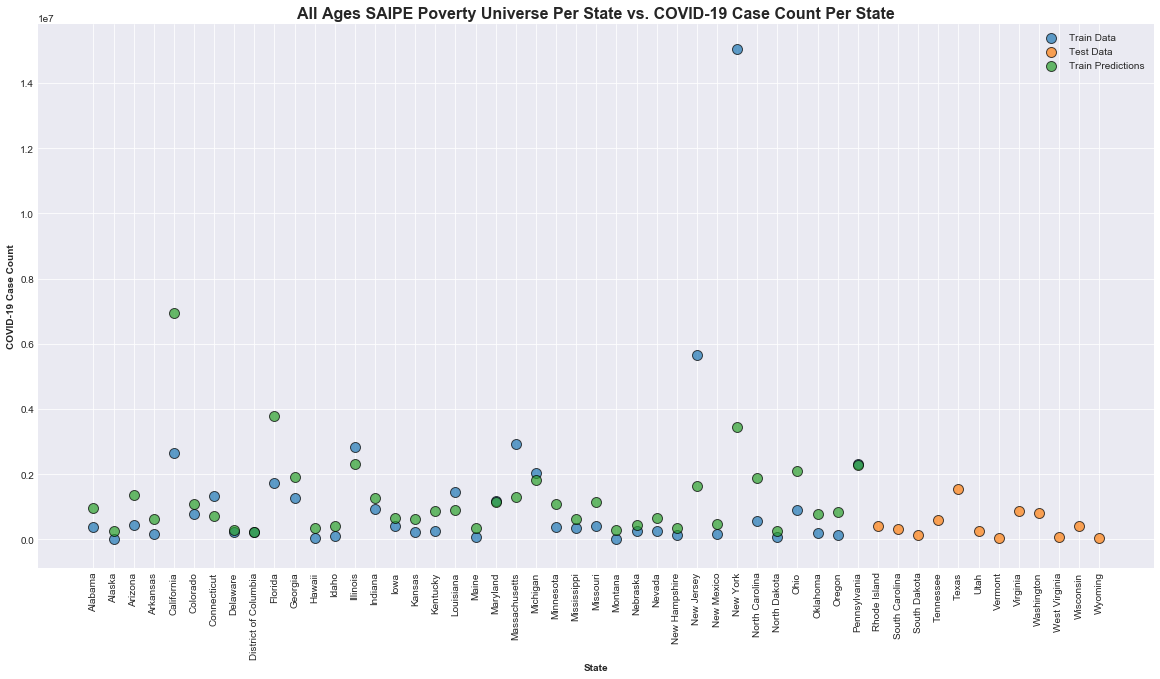

In [20]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('All Ages SAIPE Poverty Universe Per State vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

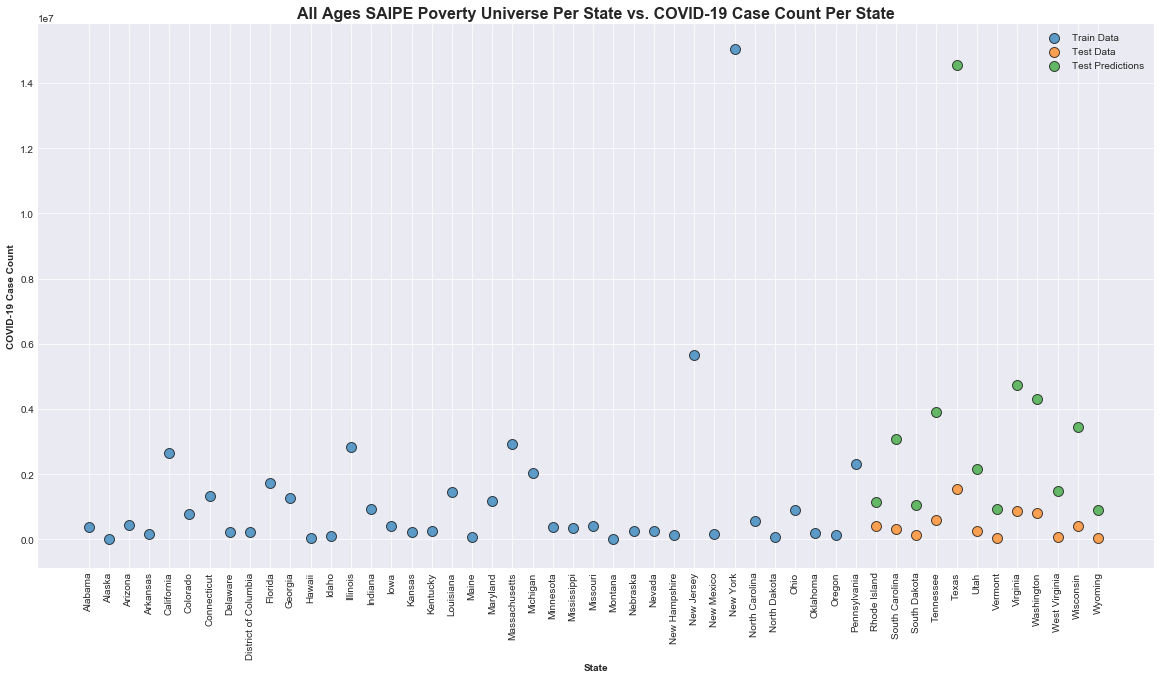

In [21]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('All Ages SAIPE Poverty Universe Per State vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [22]:
features_list = ['All Ages in Poverty Count']

target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test).reshape(-1, 1))

LRModel = LinearRegression()
LRModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = LRModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = LRModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 558500.624122243
MSE Value: 369518680194.64435
RMS Value: 607880.4818339247
R2 Score: -1.0097328273792154


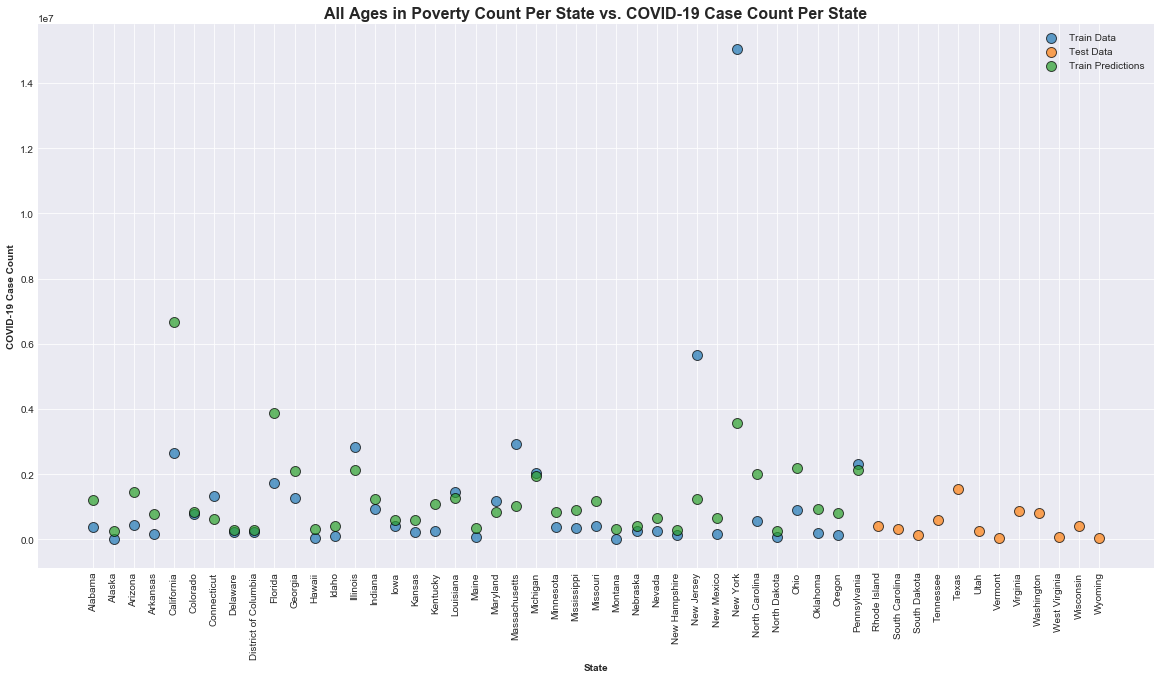

In [23]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('All Ages in Poverty Count Per State vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

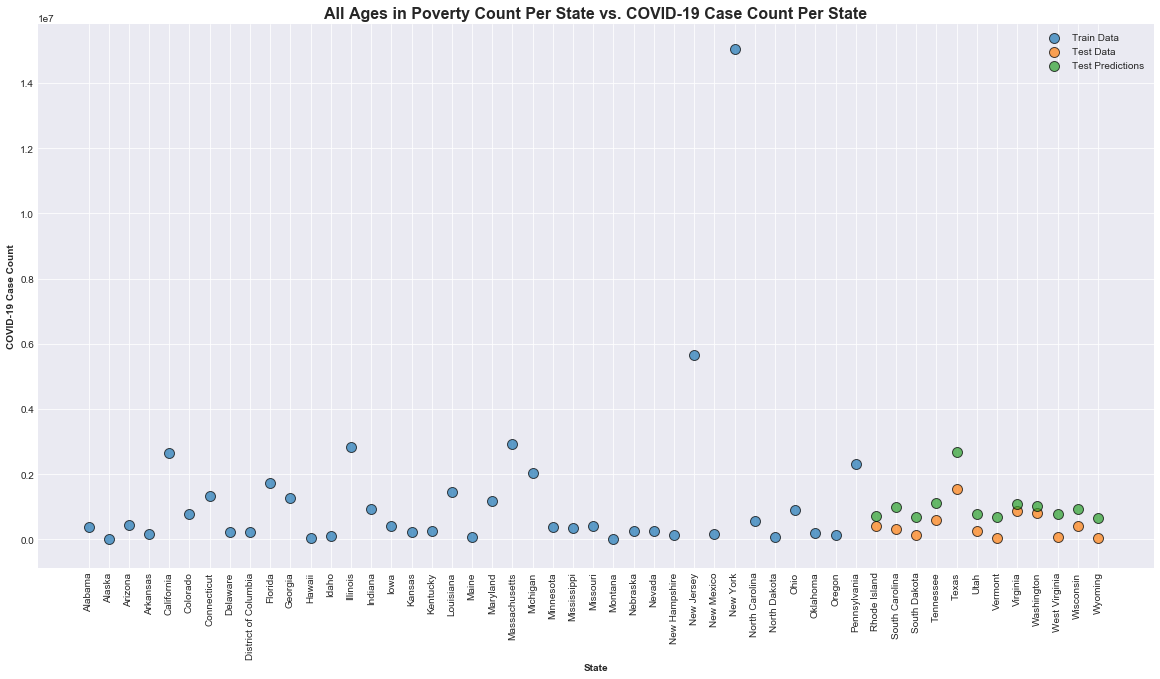

In [24]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('All Ages in Poverty Count Per State vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [25]:
features_list = ['All Ages SAIPE Poverty Universe','All Ages in Poverty Count']

target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
X_test_scaled = scaler.transform(X_test)

LRModel = LinearRegression()
LRModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = LRModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = LRModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMS = sqrt(mean_squared_error(y_test, test_predictions))
R2Score = r2_score(y_test, test_predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 4665045.271176187
MSE Value: 49218076750981.51
RMS Value: 7015559.617805376
R2 Score: -266.6865605138382
